## Student Name: Liyanze Liu
## Student Number: 1009172324

In [52]:
# Importing libraries
import pandas as pd
%pip install dfply
from dfply import *
import seaborn as sns
import matplotlib.pyplot as plt
%pip install pingouin
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [53]:
# Loading the data from CSV
df_a3=pd.read_csv("INF2178_A3_data.csv")

# Displaying the few rows to the df_a3
df_a3.head(4)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2


springreadingscore



In [54]:
# Summary statistics for dependent variable yield
df_a3 >> group_by(X.incomegroup) >> summarize(count_reading=X['springreadingscore'].count(),
                                    mean_reading=X['springreadingscore'].mean(),
                                    std_reading=X['springreadingscore'].std())

,incomegroup,count_reading,mean_reading,std_reading
0,1,4729,43.665077,12.004821
1,2,3726,48.009450,13.505020
2,3,3478,52.206880,16.450153


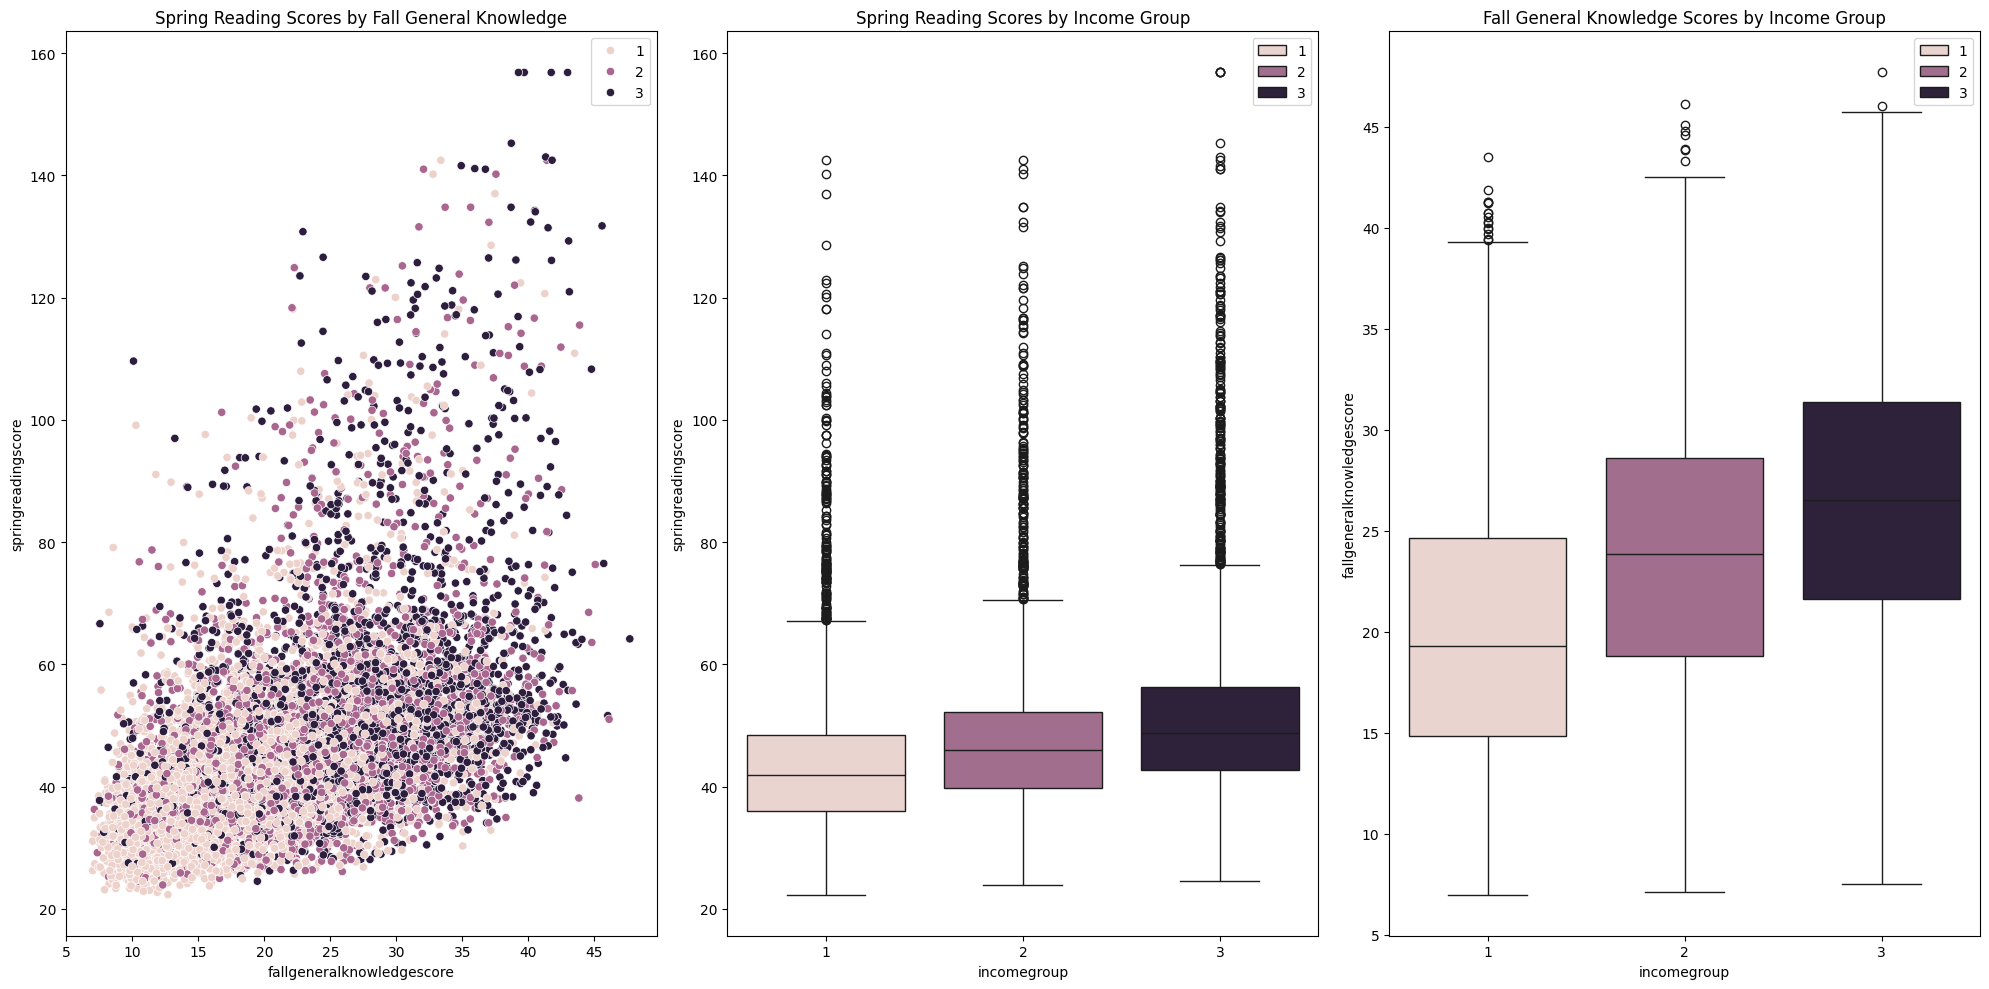

In [55]:
# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Scatter plot for reading scores by fall general knowledge scores
sns.scatterplot(data=df_a3, x="fallgeneralknowledgescore", y="springreadingscore", hue=df_a3.incomegroup.tolist(), ax=axs[0])
axs[0].set_title("Spring Reading Scores by Fall General Knowledge")

# Box plot for spring reading scores by income group
sns.boxplot(data=df_a3, x="incomegroup", y="springreadingscore", hue=df_a3.incomegroup.tolist(), ax=axs[1])
axs[1].set_title("Spring Reading Scores by Income Group")

# Box plot for fall general knowledge scores by income group
sns.boxplot(data=df_a3, x="incomegroup", y="fallgeneralknowledgescore", hue=df_a3.incomegroup.tolist(), ax=axs[2])
axs[2].set_title("Fall General Knowledge Scores by Income Group")

plt.tight_layout()
plt.show()

In [56]:
# ANCOVA for spring reading scores controlling for fall general knowledge scores
ancova_result_reading = ancova(data=df_a3, dv='springreadingscore', covar='fallgeneralknowledgescore', between='incomegroup')

# Display the ANCOVA results for reading scores
ancova_result_reading

,Source,SS,DF,F,p-unc,np2
0,incomegroup,2.044032e+04,2,62.526295,9.694407e-28,0.010374
1,fallgeneralknowledgescore,3.518276e+05,1,2152.459429,0.000000e+00,0.152858
2,Residual,1.949840e+06,11929,NaN,NaN,NaN


In [57]:
# Fit an OLS model
model_reading = ols('springreadingscore ~ C(incomegroup) + fallgeneralknowledgescore', data=df_a3).fit()

# Print model summary
print(model_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:12:33   Log-Likelihood:                -47339.
No. Observations:               11933   AIC:                         9.469e+04
Df Residuals:                   11929   BIC:                         9.471e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [58]:
# Fit OLS model with interaction
model_interaction_reading = ols('springreadingscore ~ C(incomegroup) * fallgeneralknowledgescore', data=df_a3).fit()

# Print model summary
print(model_interaction_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:12:33   Log-Likelihood:                -47338.
No. Observations:               11933   AIC:                         9.469e+04
Df Residuals:                   11927   BIC:                         9.473e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

springmathscore

In [59]:
# Summary statistics for dependent variable yield
df_a3 >> group_by(X.incomegroup) >> summarize(count_math=X['springmathscore'].count(),
                                    mean_math=X['springmathscore'].mean(),
                                    std_math=X['springmathscore'].std())

,incomegroup,count_math,mean_math,std_math
0,1,4729,33.883051,10.734653
1,2,3726,38.464691,11.359349
2,3,3478,42.411898,12.605759


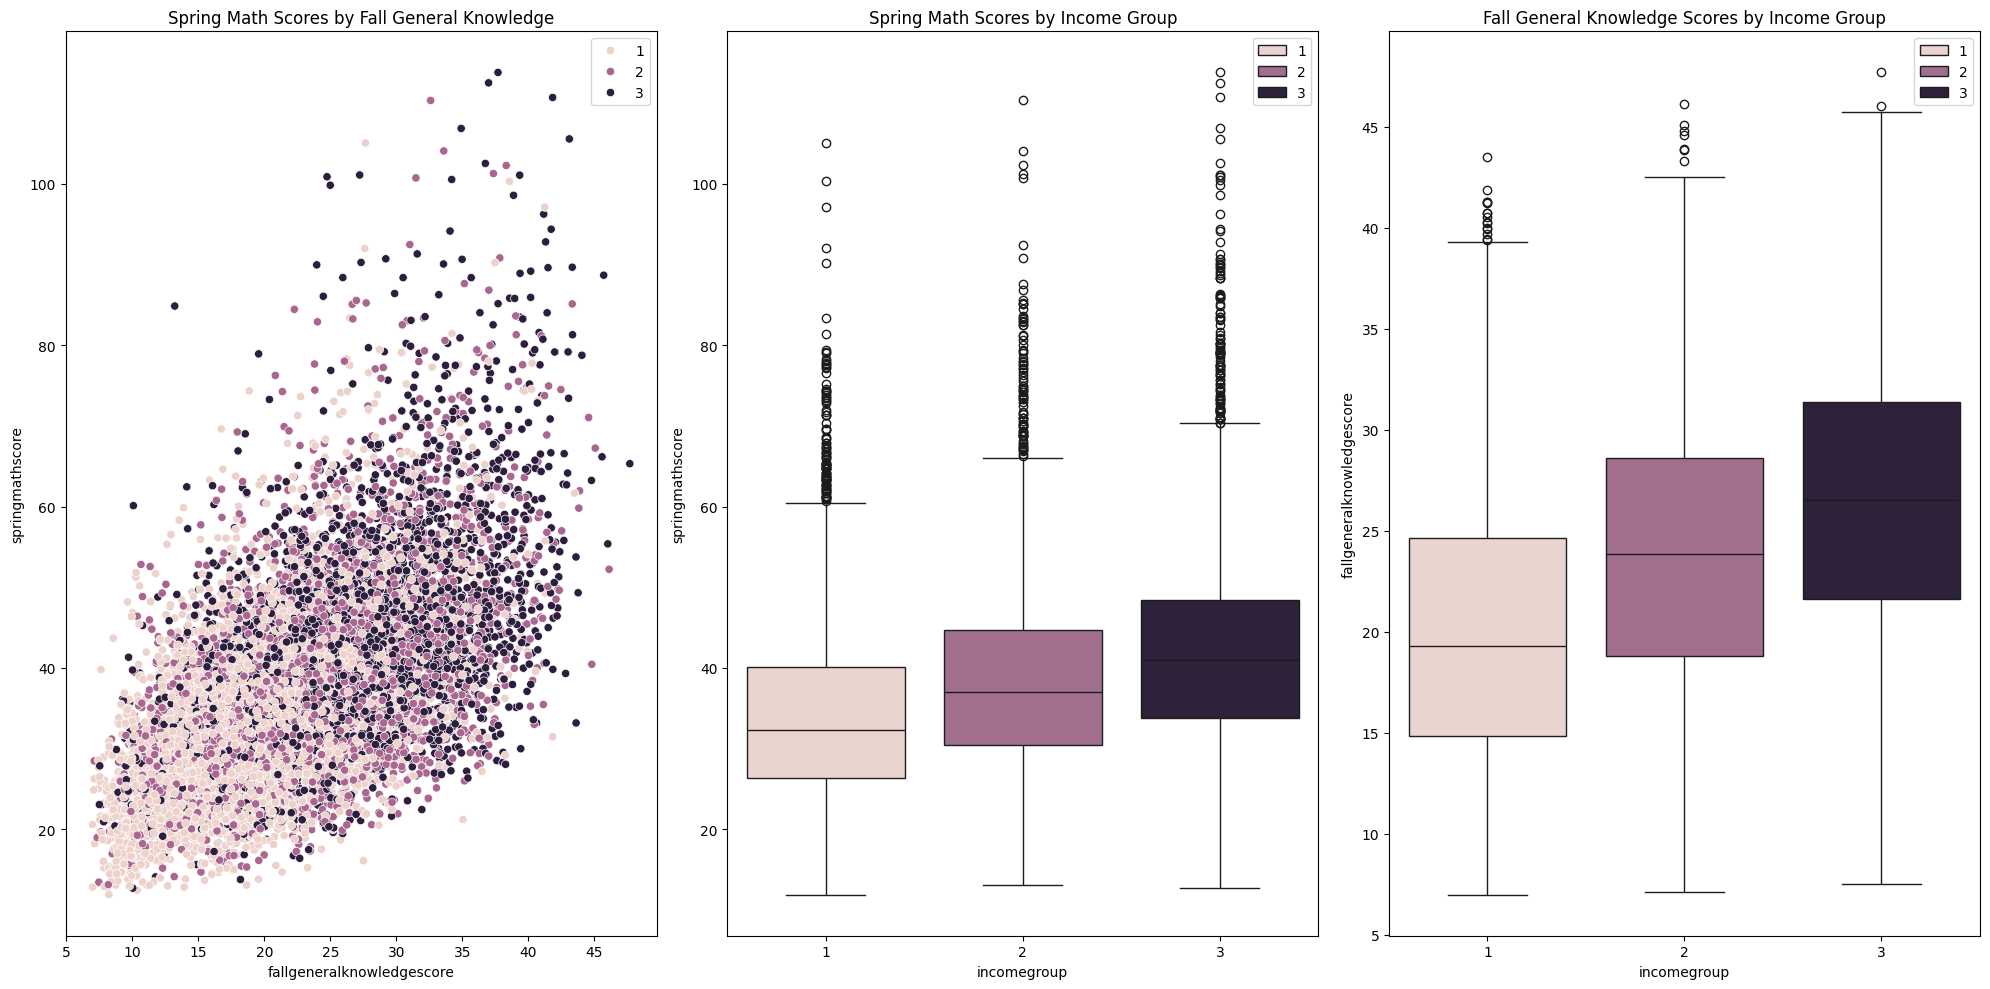

In [60]:
# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Scatter plot for spring math scores by fall general knowledge scores
sns.scatterplot(data=df_a3, x="fallgeneralknowledgescore", y="springmathscore", hue=df_a3.incomegroup.tolist(), ax=axs[0])
axs[0].set_title("Spring Math Scores by Fall General Knowledge")

# Box plot for spring math scores by income group
sns.boxplot(data=df_a3, x="incomegroup", y="springmathscore", hue=df_a3.incomegroup.tolist(), ax=axs[1])
axs[1].set_title("Spring Math Scores by Income Group")

# Box plot for fall general knowledge scores by income group
sns.boxplot(data=df_a3, x="incomegroup", y="fallgeneralknowledgescore", hue=df_a3.incomegroup.tolist(), ax=axs[2])
axs[2].set_title("Fall General Knowledge Scores by Income Group")

plt.tight_layout()
plt.show()

In [61]:
# ANCOVA for spring math scores controlling for fall general knowledge scores
ancova_result_math = ancova(data=df_a3, dv='springmathscore', covar='fallgeneralknowledgescore', between='incomegroup')

# Display the ANCOVA results for math scores
ancova_result_math

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.281978e+04,2,67.934909,4.602575e-30,0.011262
1,fallgeneralknowledgescore,4.524467e+05,1,4795.235313,0.000000e+00,0.286724
2,Residual,1.125542e+06,11929,NaN,NaN,NaN


In [62]:
# Fit an OLS model
model_math = ols('springmathscore ~ C(incomegroup) + fallgeneralknowledgescore', data=df_a3).fit()

# Print model summary
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2122.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:12:36   Log-Likelihood:                -44060.
No. Observations:               11933   AIC:                         8.813e+04
Df Residuals:                   11929   BIC:                         8.816e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [63]:
# Fit OLS model with interaction
model_interaction_math = ols('springmathscore ~ C(incomegroup) * fallgeneralknowledgescore', data=df_a3).fit()

# Print model summary
print(model_interaction_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     1274.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:12:36   Log-Likelihood:                -44059.
No. Observations:               11933   AIC:                         8.813e+04
Df Residuals:                   11927   BIC:                         8.817e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------